In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

C:\Users\ACER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X= data[['Annual Income (k$)','Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [5]:
X.shape

(200, 2)

In [6]:
X.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [7]:
X.isna().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

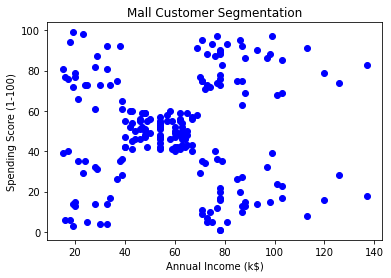

In [8]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], color='blue')
plt.title('Mall Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
print("Unique values in y_kmeans:", np.unique(y_kmeans))
print("Shape of X:", X.shape)
print("First few rows of X:")
print(X[:5])
print("Values of y_kmeans:", y_kmeans)
print("Data types in X:", X.dtypes)
print("Unique values in y_kmeans:", np.unique(y_kmeans))


In [10]:

indices = [np.where(y_kmeans == i)[0] for i in range(6)]
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'orange']
for i, color in zip(range(6), colors):
    plt.scatter(X.iloc[indices[i], 0], X.iloc[indices[i], 1], s=100, c=color, label=f'Cluster {i+1}')

# Plot cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


NameError: name 'y_kmeans' is not defined